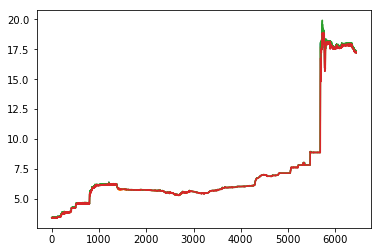

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data = pd.read_csv('USD_EGP Historical Data.csv')
data=data.drop('Change %',axis=1)
data=data.drop('Date',axis=1)
data=data[::-1]
plt.plot(data)